In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling missing value and drop it

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

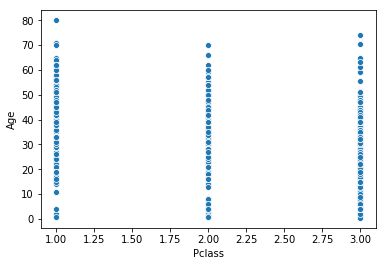

In [4]:
sns.scatterplot('Pclass','Age',data=df)

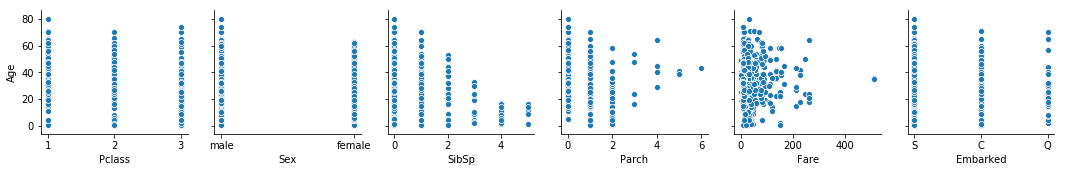

In [5]:
sns.pairplot(x_vars=['Pclass','Sex','SibSp','Parch','Fare','Embarked'],y_vars='Age',data=df)

In [6]:
df.groupby('SibSp').Age.describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


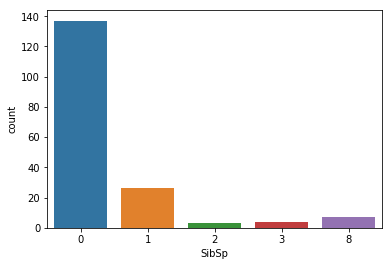

In [7]:
sns.countplot(x='SibSp',data=df[df['Age'].isnull()])

In [8]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df['Age'].median()

28.0

In [10]:
df['Age']=np.where((df['SibSp']==8)& (df['Age'].isnull()),28.0,df['Age'])

In [11]:
df['Age']=np.where((df['SibSp']==0)& (df['Age'].isnull()),29.0,df['Age'])
df['Age']=np.where((df['SibSp']==1)& (df['Age'].isnull()),30.0,df['Age'])
df['Age']=np.where((df['SibSp']==2)& (df['Age'].isnull()),23.0,df['Age'])
df['Age']=np.where((df['SibSp']==3)& (df['Age'].isnull()),10.0,df['Age'])

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Outlier Handling

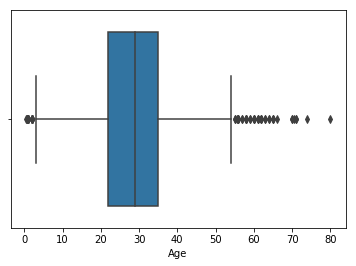

In [15]:
sns.boxplot(df['Age'])

In [16]:
df[df['Age']>79]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
630,1,1,male,80.0,0,0,30.0,S


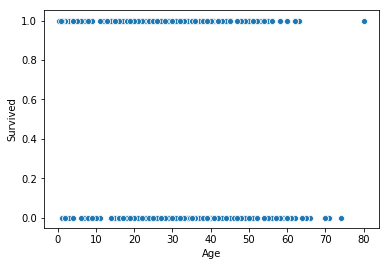

In [17]:
sns.scatterplot('Age','Survived',data=df)

In [18]:
df.drop(df[df['Age']>79].index,inplace=True)

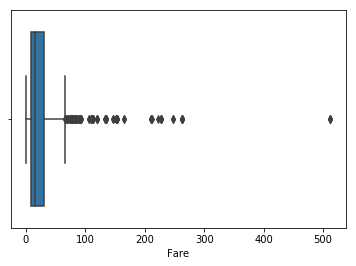

In [19]:
sns.boxplot(df['Fare'])

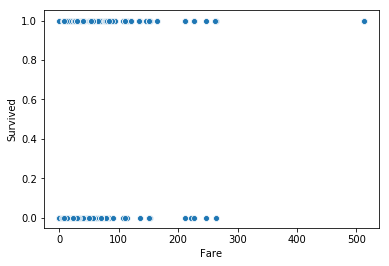

In [20]:
sns.scatterplot('Fare','Survived',data=df)

In [21]:
df.sort_values('Fare',ascending=False).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
737,1,1,male,35.0,0,0,512.3292,C
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S


In [22]:
df.drop(df[df['Fare']>500].index,inplace=True)

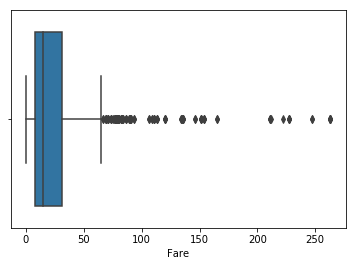

In [23]:
sns.boxplot(df['Fare'])

## Logistic Regression Model to Predict chances of Survival

In [24]:
df_num= df[df.select_dtypes(include=np.number).columns]

In [25]:
df_cat= df[df.select_dtypes(include='object').columns]

In [26]:
df_dummy= pd.get_dummies(df_cat)

In [27]:
df_new =pd.concat([df_num,df_dummy],axis=1)

In [28]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [29]:
x = df_new.drop(['Survived','Sex_female','Embarked_C'],axis=1)
y= df_new['Survived']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=8)

In [32]:
log = LogisticRegression(C=.09)

In [33]:
log.fit(x_train,y_train)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
log.score(x_test,y_test)

0.7752808988764045

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(log,{'C':[.001,0.1,0.01,10,0.9]})

In [37]:
grid.fit(x_train,y_train)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=0.09, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 0.01, 10, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
grid.best_params_

{'C': 0.9}

In [39]:
grid.best_score_

0.8064516129032258

In [40]:
y_pred = log.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[146  21]
 [ 39  61]]


In [42]:
208/(208+59)

0.7790262172284644

## Area Under ROC curve

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
area_under_roc = roc_auc_score(y_test,y_pred)
print(area_under_roc)

0.742125748502994


## Plotting ROC curve

In [45]:
from sklearn.metrics import roc_curve

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(x_test)[:,1])

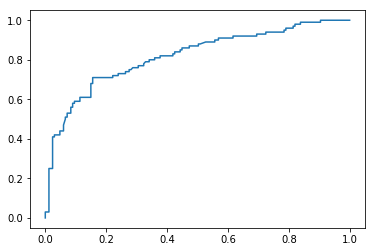

In [47]:
plt.plot(fpr,tpr)

In [48]:
log.predict_proba(x_test) #they give me exact probalility nd yh compare kr raha h 0.5 se agar jyda h toh chance h survive 
# agar or compare krna h toh compare with y_pred(soft prediction)

array([[0.65899314, 0.34100686],
       [0.82398132, 0.17601868],
       [0.83251622, 0.16748378],
       [0.7816001 , 0.2183999 ],
       [0.47020601, 0.52979399],
       [0.15474654, 0.84525346],
       [0.45637755, 0.54362245],
       [0.50741685, 0.49258315],
       [0.80856121, 0.19143879],
       [0.82713427, 0.17286573],
       [0.58195868, 0.41804132],
       [0.7697699 , 0.2302301 ],
       [0.50982002, 0.49017998],
       [0.54255857, 0.45744143],
       [0.76645218, 0.23354782],
       [0.07355685, 0.92644315],
       [0.8215737 , 0.1784263 ],
       [0.81988079, 0.18011921],
       [0.70614892, 0.29385108],
       [0.7878591 , 0.2121409 ],
       [0.55991336, 0.44008664],
       [0.81055443, 0.18944557],
       [0.51067546, 0.48932454],
       [0.42537403, 0.57462597],
       [0.80177164, 0.19822836],
       [0.82327056, 0.17672944],
       [0.22445874, 0.77554126],
       [0.64271381, 0.35728619],
       [0.41584973, 0.58415027],
       [0.49859453, 0.50140547],
       [0.

In [49]:
thresholds

array([1.97215773, 0.97215773, 0.91381724, 0.88624681, 0.8267433 ,
       0.81776937, 0.70264553, 0.69613462, 0.57647215, 0.57462597,
       0.57386723, 0.56805329, 0.55834642, 0.55312091, 0.54942518,
       0.54620074, 0.54615858, 0.54479549, 0.53256528, 0.52944543,
       0.52296494, 0.52190611, 0.51843386, 0.51731143, 0.51663699,
       0.5127715 , 0.50154425, 0.49258315, 0.49017998, 0.48932454,
       0.48080398, 0.47649471, 0.46825829, 0.37092892, 0.36967317,
       0.36425731, 0.35728619, 0.34100686, 0.33940235, 0.33593055,
       0.33014627, 0.32172469, 0.32112512, 0.32090069, 0.31729296,
       0.31679744, 0.30787053, 0.30306064, 0.29620879, 0.29435405,
       0.29385108, 0.28359196, 0.26003684, 0.24769821, 0.24672006,
       0.23354782, 0.23090262, 0.2302301 , 0.22898817, 0.22557807,
       0.22514215, 0.22505214, 0.22505074, 0.21555294, 0.21425446,
       0.2121409 , 0.20695755, 0.20396083, 0.19905328, 0.19825539,
       0.19032428, 0.18944557, 0.18790216, 0.18775213, 0.18517

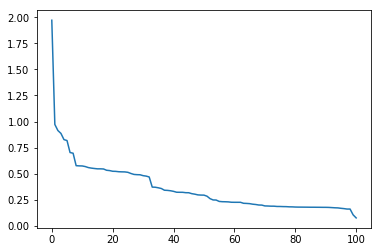

In [50]:
plt.plot(thresholds)

In [51]:
type(pd.Series(thresholds))
fpr_series = pd.Series(fpr)
tpr_series = pd.Series(tpr)
thresholds_series = pd.Series(thresholds)

In [52]:
df1 = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
df1.head()

,FPR,TPR,THRESHOLD
0,0.000000,0.00,1.972158
1,0.000000,0.01,0.972158
2,0.000000,0.03,0.913817
3,0.011976,0.03,0.886247
4,0.011976,0.11,0.826743


In [53]:
df1.sort_values('TPR',ascending=False)

,FPR,TPR,THRESHOLD
100,1.000000,1.00,0.075210
99,0.988024,1.00,0.104755
98,0.904192,1.00,0.160260
97,0.904192,0.99,0.160285
96,0.886228,0.99,0.164479
...,...,...,...
4,0.011976,0.11,0.826743
2,0.000000,0.03,0.913817
3,0.011976,0.03,0.886247
1,0.000000,0.01,0.972158


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.74      0.61      0.67       100

    accuracy                           0.78       267
   macro avg       0.77      0.74      0.75       267
weighted avg       0.77      0.78      0.77       267



In [55]:
import statsmodels.api as sm

In [56]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.496188
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.253     
Dependent Variable: Survived         AIC:              896.2379  
Date:               2020-07-16 16:47 BIC:              934.5407  
No. Observations:   887              Log-Likelihood:   -440.12   
Df Model:           7                LL-Null:          -589.48   
Df Residuals:       879              LLR p-value:      1.1307e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        0.0413    0.0863    0.4786  0.6322  -0.1278   0.2104
Age           0.0039    0.0058    0.6703  0.5027  -0.0075   0.

In [57]:
x1 = df_new.drop(['Survived','Sex_female','Embarked_C','Pclass','Age','Parch','Embarked_Q'],axis=1)
y1= df_new['Survived']
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.7, random_state=8)
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.498684
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.2496
Time:                        16:47:55   Log-Likelihood:                -442.33
converged:                       True   LL-Null:                       -589.48
Covariance Type:            nonrobust   LLR p-value:                 1.703e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.3041      0.087     -3.505      0.000      -0.474      -0.134
Fare           0.0187      0.

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       167
           1       0.72      0.68      0.70       100

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



# Feature selection techniques that are easy to use and also gives good results.

Forward Selection : Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

## Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [61]:
x = df_new.drop(['Survived','Sex_female','Embarked_C'],axis=1)
y= df_new['Survived']

In [68]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x,y)

In [69]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [72]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['titanic','Score'] 
featureScores

,titanic,Score
0,Pclass,29.401143
1,Age,25.021426
2,SibSp,2.206805
3,Parch,10.388883
4,Fare,3375.583327
5,Sex_male,93.866840
6,Embarked_Q,0.023870
7,Embarked_S,5.074271


In [73]:
print(featureScores.nlargest(10,'Score'))

      titanic        Score
4        Fare  3375.583327
5    Sex_male    93.866840
0      Pclass    29.401143
1         Age    25.021426
3       Parch    10.388883
7  Embarked_S     5.074271
2       SibSp     2.206805
6  Embarked_Q     0.023870


In [74]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.496188
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.2534
Time:                        16:53:20   Log-Likelihood:                -440.12
converged:                       True   LL-Null:                       -589.48
Covariance Type:            nonrobust   LLR p-value:                 1.131e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0413      0.086      0.479      0.632      -0.128       0.210
Age            0.0039      0.

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)


C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [76]:
print(model.feature_importances_)

[0.09776104 0.22080678 0.05140941 0.04438616 0.25913779 0.29586423
 0.00838707 0.02224752]


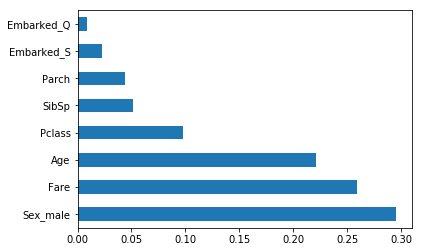

In [77]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

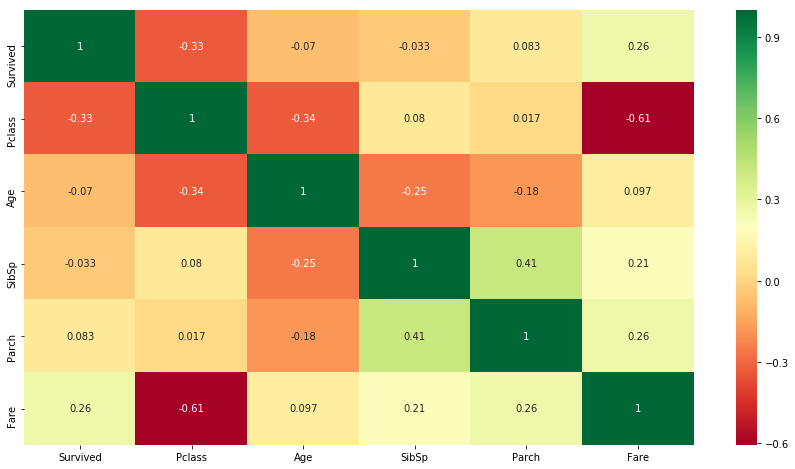

In [79]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")